# Automatic Image Captioning

## Dataset Exploration

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, we will explore this dataset, in preparation for the project.

## Step 1: Initializing the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that we will use to obtain the data.

In [3]:
import os
import sys

from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# path to cocoapi directory
data_dir = r"C:\Users\santo\Downloads\MS COCO Dataset\captions"
data_type = "val2014"
instances_ann_file = os.path.join(
    data_dir, "annotations", f"instances_{data_type}.json"
)
coco = COCO(instances_ann_file)

# initialize COCO API for caption annotations
captions_ann_file = os.path.join(data_dir, "annotations", f"captions_{data_type}.json")
coco_caps = COCO(captions_ann_file)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=13.65s)
creating index...
index created!
loading annotations into memory...
Done (t=1.29s)
creating index...
index created!


In [4]:
coco.anns

{156: {'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156},
 509: {'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22,
    348.92,
    239.04,
    353.73,
    248.67,
    355.66,
    252.53,
    353.73]],
  'area': 1545.4213000000007,
  'iscrowd': 0,
 

{'license': 2, 'file_name': 'COCO_val2014_000000449963.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000449963.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-21 02:36:20', 'flickr_url': 'http://farm9.staticflickr.com/8450/7987323911_90e33ef91a_z.jpg', 'id': 449963}
http://images.cocodataset.org/val2014/COCO_val2014_000000449963.jpg


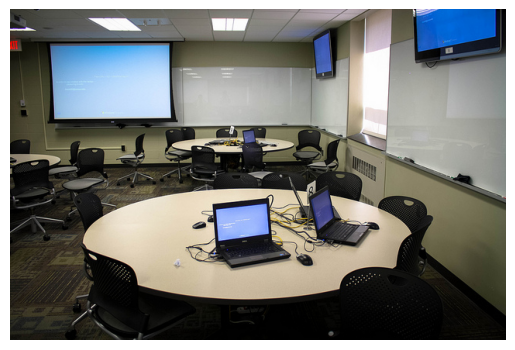

Screens are everywhere in a business training area.
Three large screens glow in the meeting room, as open laptops sit on top of the round tables, spread out around the room.
The conference room has  many tables and chairs with monitors on the wall.
a business work area with desks, laptops and tvs
A computer lab with laptops and screens and chairs.


In [8]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]["image_id"]
img = coco.loadImgs(img_id)[0]
url = img["coco_url"]

print(img)
# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis("off")
plt.imshow(I)
plt.show()

# load and display captions
ann_ids = coco_caps.getAnnIds(imgIds=img["id"])
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)